In [1]:
import matplotlib.pyplot as plt

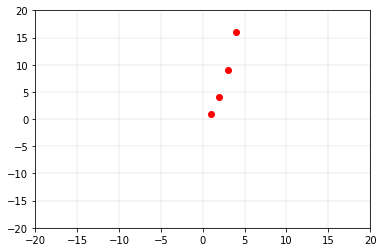

In [2]:
plt.grid(color='black', linestyle='--', linewidth=0.1)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([-20, 20, -20, 20])
plt.show()

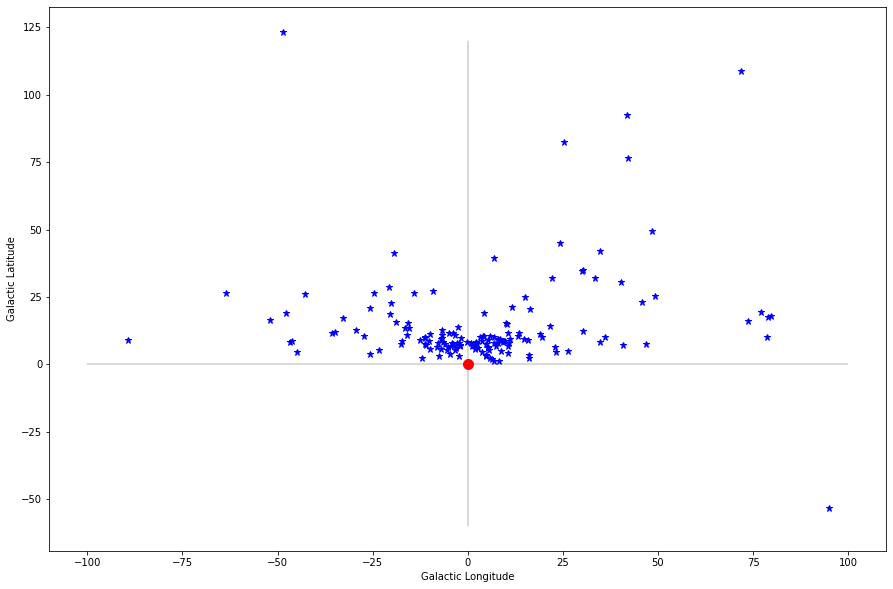

In [3]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

datafile = "a25_hw2_gc_pos.dat"
filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

f = open(datafile)
raw_data = f.readlines()
f.close()

proc_data = []
for line in raw_data:
    new_line = line.split("\t")
    proc_data.append(new_line)

gal_coords = [[],[]]
for row in proc_data[1:]:
    if float(row[7]) > 180:
        gal_coords[0].append(-(360 - float(row[7])))
    else:
        gal_coords[0].append(float(row[7]))
    gal_coords[1].append(float(row[8]))

#print(gal_coords)

#plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.figure(figsize=(15,10))
plt.plot([-100,100],[0, 0], "k-", linewidth=0.3)
plt.plot([0, 0], [-60,120], "k-", linewidth=0.3)
plt.plot([0], [0], "ro", markersize="10")
plt.plot(gal_coords[0], gal_coords[1], "b*", markersize="7")

plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.show()

In [4]:
import math
import matplotlib.patches as mpatches

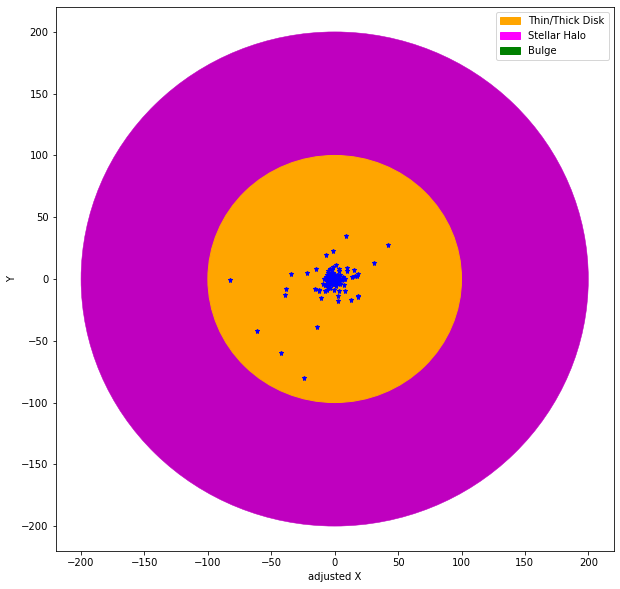

In [42]:
xy_coords = [[],[]]
for row in proc_data[1:]:
    xy_coords[0].append(float(row[-3])-8)
    xy_coords[1].append(float(row[-2]))

#print(gal_coords)

#plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.figure(figsize=(10,10))

halo = plt.Circle((0, 0), 100*2, color='m', fill=True, linewidth=0.5)
plt.gca().add_patch(halo)
disk = plt.Circle((0, 0), 50*2, color='orange', fill=True)
plt.gca().add_patch(disk)
bulge = plt.Circle((0, 0), 2*2, color='g', fill=True, linewidth=0.5)
plt.gca().add_patch(bulge)

#plt.plot([-5,5],[0, 0], "k-", linewidth=0.3)
#plt.plot([0, 0], [-5,5], "k-", linewidth=0.3)
#plt.plot([0], [0], "ro", markersize="10")
plt.plot(xy_coords[0], xy_coords[1], "b*", markersize="5")

patch1 = mpatches.Patch(color='orange', label='Thin/Thick Disk')
patch3 = mpatches.Patch(color='magenta', label='Stellar Halo')
patch4 = mpatches.Patch(color='green', label='Bulge')
plt.legend(handles=[patch1, patch3, patch4])

plt.xlabel('adjusted X')
plt.ylabel('Y')
plt.show()

In [6]:
from matplotlib.patches import Ellipse

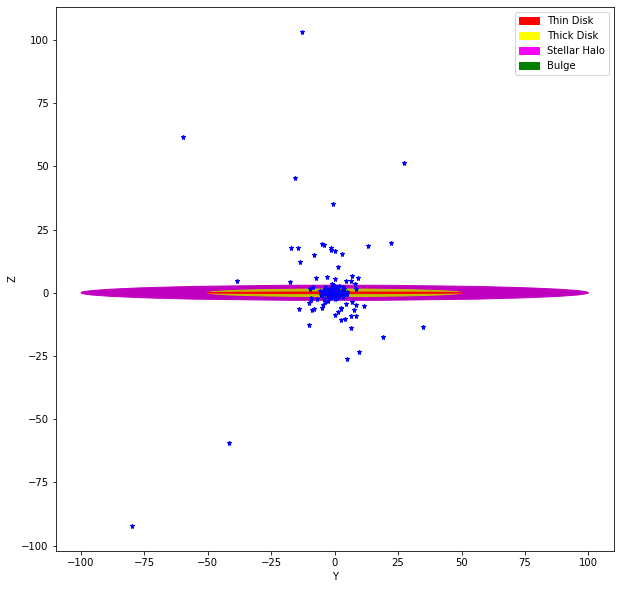

In [49]:
yz_coords = [[],[]]
for row in proc_data[1:]:
    yz_coords[0].append(float(row[-2]))
    yz_coords[1].append(float(row[-1][:-1]))

plt.figure(figsize=(10,10))
#print(gal_coords)

halo = Ellipse((0, 0), 100*2, 3*2, color='m', fill=True)
plt.gca().add_patch(halo)
thick_disk = Ellipse((0, 0), 50*2, 1.5*2, color='y', fill=True)
plt.gca().add_patch(thick_disk)
thin_disk = Ellipse((0, 0), 50*2, 0.325*2, color='r', fill=True)
plt.gca().add_patch(thin_disk)

bulge = Ellipse((0, 0), 2*2, 0.4*2, color='g', fill=True)
plt.gca().add_patch(bulge)


#plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

#plt.plot([-4,4],[0, 0], "k-", linewidth=0.3)
#plt.plot([0, 0], [-4,4], "k-", linewidth=0.3)
#plt.plot([0], [0], "ro", markersize="10")
plt.plot(yz_coords[0], yz_coords[1], "b*", markersize="5")

patch1 = mpatches.Patch(color='red', label='Thin Disk')
patch2 = mpatches.Patch(color='yellow', label='Thick Disk')
patch3 = mpatches.Patch(color='magenta', label='Stellar Halo')
patch4 = mpatches.Patch(color='green', label='Bulge')
plt.legend(handles=[patch1, patch2, patch3, patch4])

plt.xlabel('Y')
plt.ylabel('Z')
plt.show()

In [99]:
import numpy as np

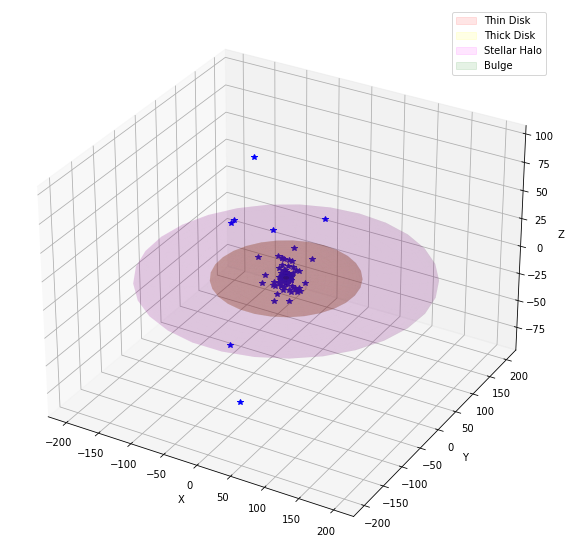

In [100]:
xyz_coords = [[],[],[]]
for row in proc_data[1:]:
    xyz_coords[0].append(float(row[-3])-8)
    xyz_coords[1].append(float(row[-2]))
    xyz_coords[2].append(float(row[-1][:-1]))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#print(gal_coords)

# halo = Ellipse((0, 0), math.log(100*2,10), math.log(3*2,10), color='m', fill=True)
# plt.gca().add_patch(halo)
# thick_disk = Ellipse((0, 0), math.log(50*2,10), math.log(1.5*2,10), color='y', fill=True)
# plt.gca().add_patch(thick_disk)
# thin_disk = Ellipse((0, 0), math.log(50*2,10), math.log(0.325*2,10), color='r', fill=True)
# plt.gca().add_patch(thin_disk)
# bulge = Ellipse((0, 0), math.log(2*2,10), math.log(0.4*2,10), color='g', fill=True)
# plt.gca().add_patch(bulge)

#plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
# draw sphere
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(200*np.sin(u), np.sin(v))
y = np.outer(200*np.sin(u), np.cos(v))
z = np.outer(6*np.cos(u), np.ones_like(v))

ax.plot_surface(x, y, z, color="m", alpha=0.1)

x = np.outer(100*np.sin(u), np.sin(v))
y = np.outer(100*np.sin(u), np.cos(v))
z = np.outer(3*np.cos(u), np.ones_like(v))

ax.plot_surface(x, y, z, color="y", alpha=0.1)

x = np.outer(100*np.sin(u), np.sin(v))
y = np.outer(100*np.sin(u), np.cos(v))
z = np.outer(0.65*np.cos(u), np.ones_like(v))

ax.plot_surface(x, y, z, color="r", alpha=0.1)

x = np.outer(4*np.sin(u), np.sin(v))
y = np.outer(4*np.sin(u), np.cos(v))
z = np.outer(0.8*np.cos(u), np.ones_like(v))

ax.plot_surface(x, y, z, color="g", alpha=0.1)

#plt.plot([-4,4],[0, 0], "k-", linewidth=0.3)
#plt.plot([0, 0], [-4,4], "k-", linewidth=0.3)
#plt.plot([0], [0], "ro", markersize="10")
ax.plot(xyz_coords[0], xyz_coords[1], xyz_coords[2], "b*")

patch1 = mpatches.Patch(color='red', alpha=0.1, label='Thin Disk')
patch2 = mpatches.Patch(color='yellow', alpha=0.1, label='Thick Disk')
patch3 = mpatches.Patch(color='magenta', alpha=0.1, label='Stellar Halo')
patch4 = mpatches.Patch(color='green', alpha=0.1, label='Bulge')
ax.legend(handles=[patch1, patch2, patch3, patch4])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()